<a href="https://colab.research.google.com/github/LosDatalovers/PracticaProfesionalizante-2025/blob/main/Pr%C3%A1ctica_Profesionalizante_Evidencia_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paso 1: Limpieza de Datos

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Configuraciones para visualización
sns.set()  # Usar estilo de seaborn sin especificar un estilo particular
pd.set_option('display.max_columns', None)

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Verificar dimensiones
print("Dimensiones del dataset de entrenamiento:", train_df.shape)
print("Dimensiones del dataset de prueba:", test_df.shape)

# Visualizar las primeras filas del conjunto de entrenamiento
train_df.head()

Dimensiones del dataset de entrenamiento: (1460, 81)
Dimensiones del dataset de prueba: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Información general sobre los datasets
print("Información del conjunto de entrenamiento:")
train_df.info()

print("\nInformación del conjunto de prueba:")
test_df.info()

# Resumen estadístico del conjunto de entrenamiento
train_df.describe()

# Verificar valores nulos en ambos conjuntos
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

print("\nValores nulos en conjunto de entrenamiento:")
print(missing_train[missing_train > 0].sort_values(ascending=False))

print("\nValores nulos en conjunto de prueba:")
print(missing_test[missing_test > 0].sort_values(ascending=False))

Información del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQu

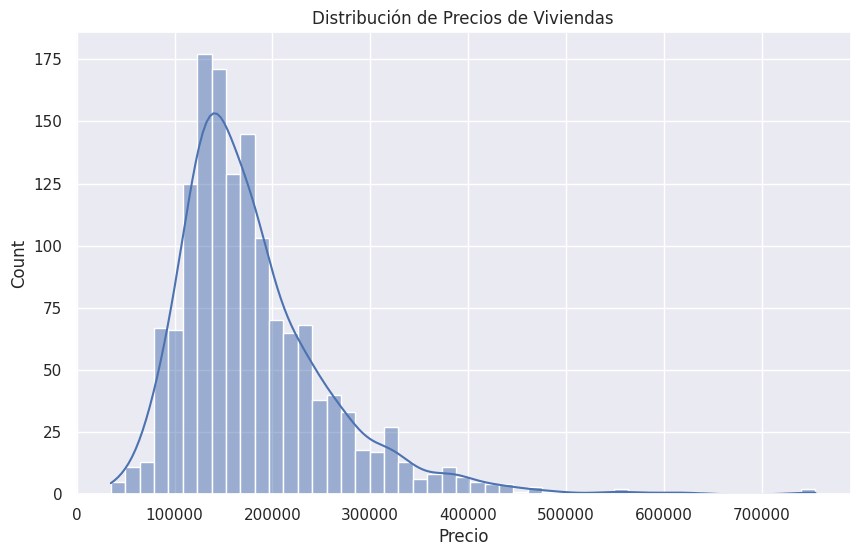

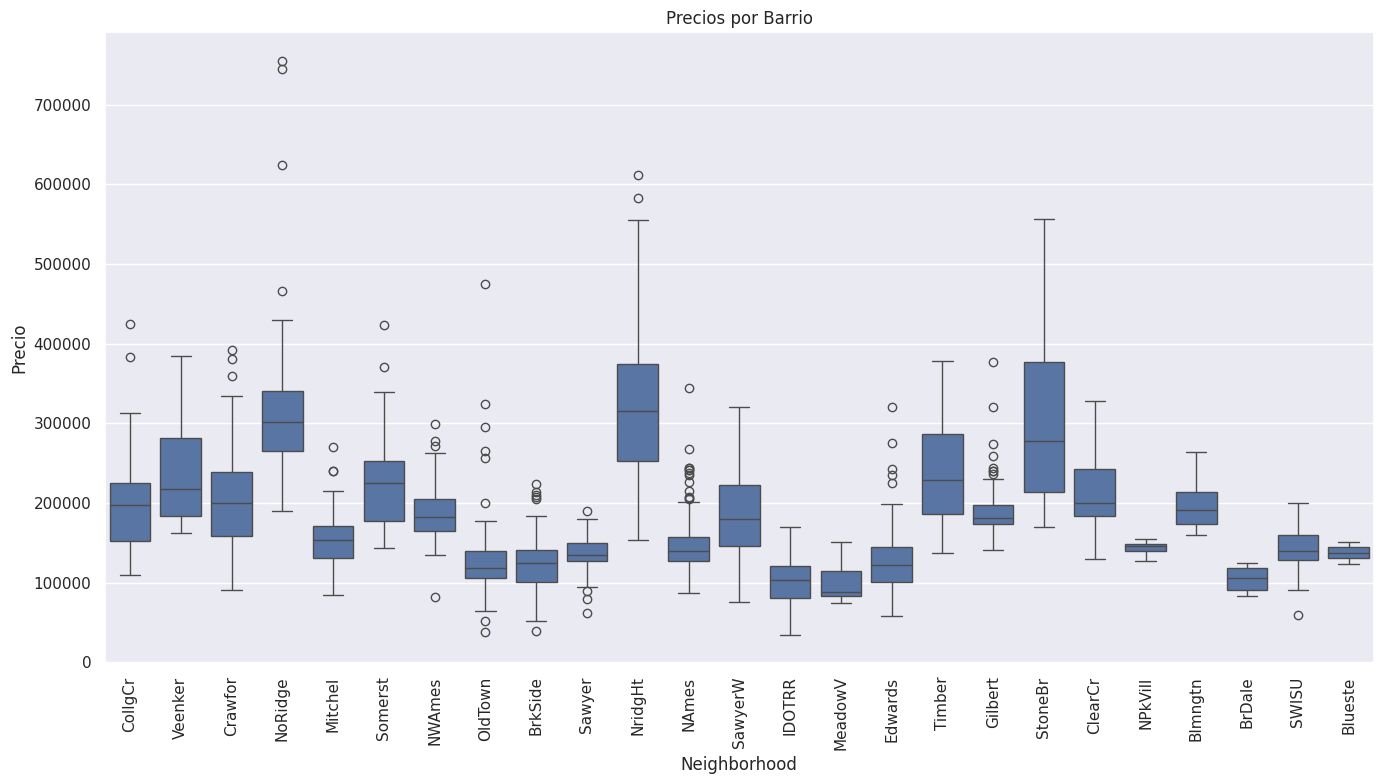

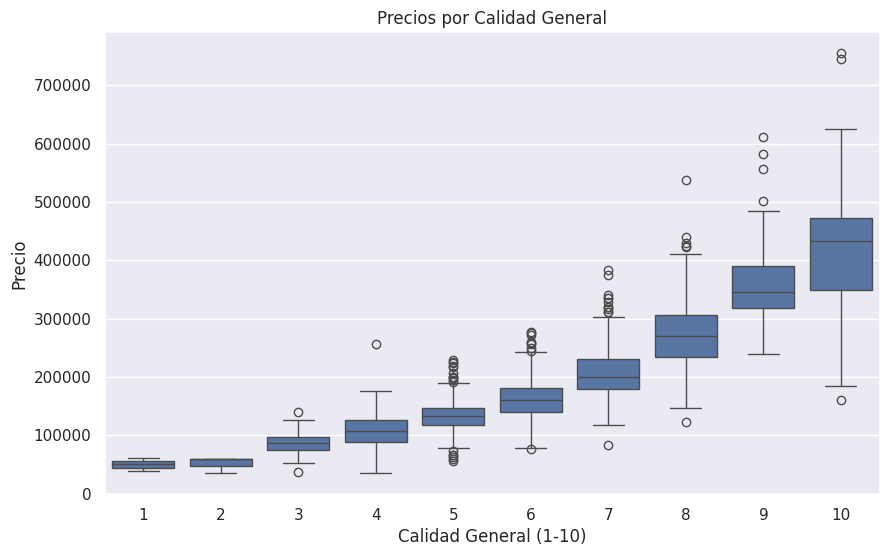

In [ ]:
# Verificar si 'SalePrice' está en el dataset de entrenamiento
target_column = 'SalePrice' if 'SalePrice' in train_df.columns else None

if target_column:
    # Distribución de precios
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[target_column], kde=True)
    plt.title('Distribución de Precios de Viviendas')
    plt.xlabel('Precio')
    plt.show()

    # Relación entre Neighborhood (Barrio) y precios
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Neighborhood', y=target_column, data=train_df)
    plt.title('Precios por Barrio')
    plt.xticks(rotation=90)
    plt.ylabel('Precio')
    plt.tight_layout()
    plt.show()

    # Relación entre calidad y precios
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='OverallQual', y=target_column, data=train_df)
    plt.title('Precios por Calidad General')
    plt.xlabel('Calidad General (1-10)')
    plt.ylabel('Precio')
    plt.show()

Número de outliers en SalePrice: 61
Límite inferior: 3937.5, Límite superior: 340037.5


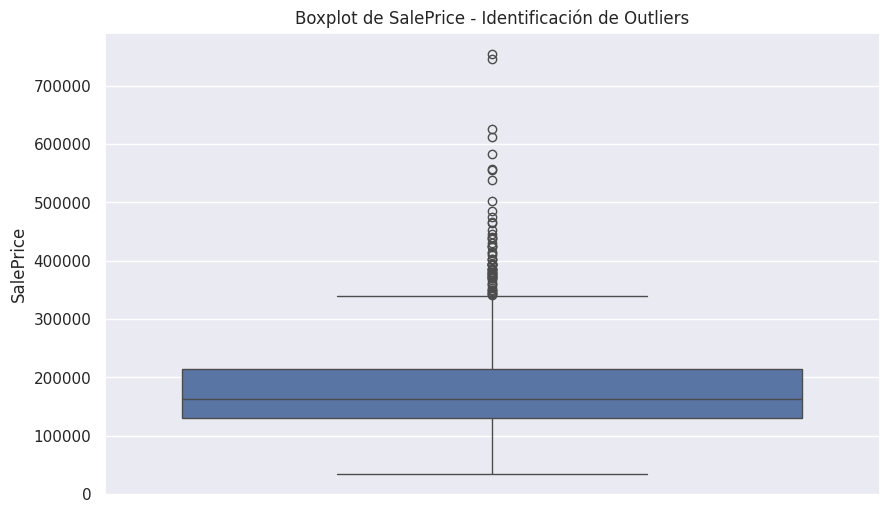

In [ ]:
# Función para identificar outliers usando IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Identificar outliers en el precio (solo en conjunto de entrenamiento)
if target_column:
    outliers, lower, upper = identify_outliers(train_df, target_column)
    print(f"Número de outliers en {target_column}: {len(outliers)}")
    print(f"Límite inferior: {lower}, Límite superior: {upper}")

    # Visualizar outliers en precio
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=train_df[target_column])
    plt.title(f'Boxplot de {target_column} - Identificación de Outliers')
    plt.show()

In [ ]:
# Agregar un identificador para saber de qué conjunto viene cada muestra
train_df['is_train'] = 1
test_df['is_train'] = 0

# Si el test no tiene la columna target, agregarla con NaN para uniformidad
if target_column and target_column not in test_df.columns:
    test_df[target_column] = np.nan

# Combinar ambos dataframes para procesamiento
combined_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
print(f"Dimensiones del dataset combinado: {combined_df.shape}")

# Guardar los índices originales para separar luego
train_idx = combined_df[combined_df['is_train'] == 1].index
test_idx = combined_df[combined_df['is_train'] == 0].index

Dimensiones del dataset combinado: (2919, 82)


In [ ]:
# Crear una copia del dataframe combinado para no modificar los originales
df_clean = combined_df.copy()

# Separar columnas numéricas y categóricas
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

# Eliminar columnas de identificación y la variable objetivo del procesamiento
exclude_from_processing = ['is_train', 'Id']
if target_column:
    exclude_from_processing.append(target_column)

numeric_cols = [col for col in numeric_cols if col not in exclude_from_processing]
categorical_cols = [col for col in categorical_cols if col not in exclude_from_processing]

# Imputar valores faltantes en columnas numéricas (usando mediana)
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        median_value = df_clean.loc[train_idx, col].median()  # Solo usar datos de entrenamiento para la mediana
        df_clean[col] = df_clean[col].fillna(median_value)
        print(f"Imputados {combined_df[col].isnull().sum()} valores en {col} con la mediana: {median_value}")

# Determinar valores de imputación para variables categóricas según el contexto
categorical_imputation = {}
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        # Si existen valores como 'NA' o 'None' en la columna, usarlos
        if 'NA' in df_clean[col].unique():
            categorical_imputation[col] = 'NA'
        elif 'None' in df_clean[col].unique():
            categorical_imputation[col] = 'None'
        else:
            # Usar el valor más frecuente del conjunto de entrenamiento
            categorical_imputation[col] = df_clean.loc[train_idx, col].mode()[0]

        # Aplicar imputación
        df_clean[col] = df_clean[col].fillna(categorical_imputation[col])
        print(f"Imputados {combined_df[col].isnull().sum()} valores en {col} con: {categorical_imputation[col]}")

# Verificar que no queden valores nulos
remaining_nulls = df_clean.isnull().sum()
print("\nValores nulos restantes:")
print(remaining_nulls[remaining_nulls > 0])

Imputados 486 valores en LotFrontage con la mediana: 69.0
Imputados 23 valores en MasVnrArea con la mediana: 0.0
Imputados 1 valores en BsmtFinSF1 con la mediana: 383.5
Imputados 1 valores en BsmtFinSF2 con la mediana: 0.0
Imputados 1 valores en BsmtUnfSF con la mediana: 477.5
Imputados 1 valores en TotalBsmtSF con la mediana: 991.5
Imputados 2 valores en BsmtFullBath con la mediana: 0.0
Imputados 2 valores en BsmtHalfBath con la mediana: 0.0
Imputados 159 valores en GarageYrBlt con la mediana: 1980.0
Imputados 1 valores en GarageCars con la mediana: 2.0
Imputados 1 valores en GarageArea con la mediana: 480.0
Imputados 4 valores en MSZoning con: RL
Imputados 2721 valores en Alley con: Grvl
Imputados 2 valores en Utilities con: AllPub
Imputados 1 valores en Exterior1st con: VinylSd
Imputados 1 valores en Exterior2nd con: VinylSd
Imputados 1766 valores en MasVnrType con: BrkFace
Imputados 81 valores en BsmtQual con: TA
Imputados 82 valores en BsmtCond con: TA
Imputados 82 valores en Bsmt

In [ ]:
# Identificar variables categóricas que necesitan codificación
categorical_for_encoding = df_clean.select_dtypes(include=['object']).columns.tolist()
categorical_for_encoding = [col for col in categorical_for_encoding if col not in exclude_from_processing]

# Codificación ordinal para variables de calidad
quality_mapping = {
    'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5,
    'NA': 0, 'None': 0
}

# Lista de columnas con mapeo de calidad
quality_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                'HeatingQC', 'KitchenQual', 'FireplaceQu',
                'GarageQual', 'GarageCond', 'PoolQC']

# Aplicar mapeo a columnas de calidad que existan en el dataset
for col in quality_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].map(quality_mapping)
        print(f"Aplicado mapeo de calidad a columna: {col}")

# Identificar variables nominales para one-hot encoding (excluyendo las de calidad ya mapeadas)
nominal_cols = [col for col in categorical_for_encoding if col not in quality_cols]

# Identificar variables con muchas categorías (alta cardinalidad)
high_cardinality_cols = []
for col in nominal_cols:
    num_categories = df_clean[col].nunique()
    if num_categories > 10:
        high_cardinality_cols.append((col, num_categories))
        print(f"Variable con alta cardinalidad: {col} - {num_categories} categorías")

# Manejar variables sensibles: preservarlas para análisis de fairness
sensitive_vars = ['Neighborhood', 'OverallQual']
df_sensitive = df_clean[sensitive_vars].copy() if all(var in df_clean.columns for var in sensitive_vars) else None

# Aplicar One-Hot Encoding a variables nominales (excluyendo las de alta cardinalidad que consideramos pertinentes -Neighborhood-)
nominal_cols_for_onehot = [col for col in nominal_cols if col != 'Neighborhood']

df_encoded = pd.get_dummies(df_clean, columns=nominal_cols_for_onehot, drop_first=True)
print(f"\nDimensiones después de codificación: {df_encoded.shape}")

Aplicado mapeo de calidad a columna: ExterQual
Aplicado mapeo de calidad a columna: ExterCond
Aplicado mapeo de calidad a columna: BsmtQual
Aplicado mapeo de calidad a columna: BsmtCond
Aplicado mapeo de calidad a columna: HeatingQC
Aplicado mapeo de calidad a columna: KitchenQual
Aplicado mapeo de calidad a columna: FireplaceQu
Aplicado mapeo de calidad a columna: GarageQual
Aplicado mapeo de calidad a columna: GarageCond
Aplicado mapeo de calidad a columna: PoolQC
Variable con alta cardinalidad: Neighborhood - 25 categorías
Variable con alta cardinalidad: Exterior1st - 15 categorías
Variable con alta cardinalidad: Exterior2nd - 16 categorías

Dimensiones después de codificación: (2919, 200)


In [ ]:
# Feature Engineering - Crear variables adicionales útiles
if all(col in df_encoded.columns for col in ['YearBuilt', 'YrSold']):
    # Edad de la casa al momento de la venta
    df_encoded['HouseAge'] = df_encoded['YrSold'] - df_encoded['YearBuilt']
    print("Creada variable: HouseAge (edad de la casa al momento de la venta)")

if all(col in df_encoded.columns for col in ['TotalBsmtSF', 'GrLivArea']):
    # Área total habitable
    df_encoded['TotalLivableArea'] = df_encoded['TotalBsmtSF'] + df_encoded['GrLivArea']
    print("Creada variable: TotalLivableArea (área total habitable)")

if all(col in df_encoded.columns for col in ['FullBath', 'HalfBath']):
    # Total de baños por encima del nivel del suelo
    df_encoded['TotalBathsAbvGr'] = df_encoded['FullBath'] + 0.5*df_encoded['HalfBath']
    print("Creada variable: TotalBathsAbvGr (número total de baños por encima del nivel del suelo)")

if all(col in df_encoded.columns for col in ['BsmtFullBath', 'BsmtHalfBath']):
    # Total de baños en el sótano
    df_encoded['TotalBathsBsmt'] = df_encoded['BsmtFullBath'] + 0.5*df_encoded['BsmtHalfBath']
    print("Creada variable: TotalBathsBsmt (número total de baños en el sótano)")

# Calidad y Condición combinada - Si existen las columnas
quality_condition_pairs = [
    ('OverallQual', 'OverallCond'),
    ('ExterQual', 'ExterCond'),
    ('BsmtQual', 'BsmtCond'),
    ('GarageQual', 'GarageCond')
]

for qual_col, cond_col in quality_condition_pairs:
    if qual_col in df_encoded.columns and cond_col in df_encoded.columns:
        df_encoded[f'{qual_col}_{cond_col}_Combined'] = df_encoded[qual_col] * df_encoded[cond_col]
        print(f"Creada variable combinada: {qual_col}_{cond_col}_Combined")

Creada variable: HouseAge (edad de la casa al momento de la venta)
Creada variable: TotalLivableArea (área total habitable)
Creada variable: TotalBathsAbvGr (número total de baños por encima del nivel del suelo)
Creada variable: TotalBathsBsmt (número total de baños en el sótano)
Creada variable combinada: OverallQual_OverallCond_Combined
Creada variable combinada: ExterQual_ExterCond_Combined
Creada variable combinada: BsmtQual_BsmtCond_Combined
Creada variable combinada: GarageQual_GarageCond_Combined


In [ ]:
# Separar los datos combinados en conjuntos de entrenamiento y prueba
train_processed = df_encoded.loc[train_idx].drop('is_train', axis=1)
test_processed = df_encoded.loc[test_idx].drop('is_train', axis=1)

if target_column:
    X_train = train_processed.drop(target_column, axis=1)
    y_train = train_processed[target_column]

    if target_column in test_processed.columns:
        X_test = test_processed.drop(target_column, axis=1)
        # Si test tiene valores de precio (poco común)
        if test_processed[target_column].notna().any():
            y_test = test_processed[target_column]
        else:
            y_test = None
    else:
        X_test = test_processed
        y_test = None

    print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras, {X_train.shape[1]} características")
    if X_test is not None:
        print(f"Conjunto de prueba: {X_test.shape[0]} muestras, {X_test.shape[1]} características")
else:
    print("No se encontró la variable objetivo. División en X/y no realizada.")

Conjunto de entrenamiento: 1460 muestras, 206 características
Conjunto de prueba: 1459 muestras, 206 características


In [ ]:
# Crear directorios para guardar si no existen
import os
if not os.path.exists('data_processed'):
    os.makedirs('data_processed')

# Guardar los conjuntos de datos procesados
if target_column:
    X_train.to_csv('data_processed/X_train.csv', index=False)
    X_test.to_csv('data_processed/X_test.csv', index=False)
    y_train.to_csv('data_processed/y_train.csv', index=False)

    if y_test is not None:
        y_test.to_csv('data_processed/y_test.csv', index=False)

    # Guardar variables sensibles para análisis de fairness
    if df_sensitive is not None:
        sensitive_train = df_sensitive.loc[train_idx]
        sensitive_test = df_sensitive.loc[test_idx]
        sensitive_train.to_csv('data_processed/sensitive_train.csv', index=False)
        sensitive_test.to_csv('data_processed/sensitive_test.csv', index=False)

    print("Datos procesados guardados en el directorio 'data_processed'")

Datos procesados guardados en el directorio 'data_processed'


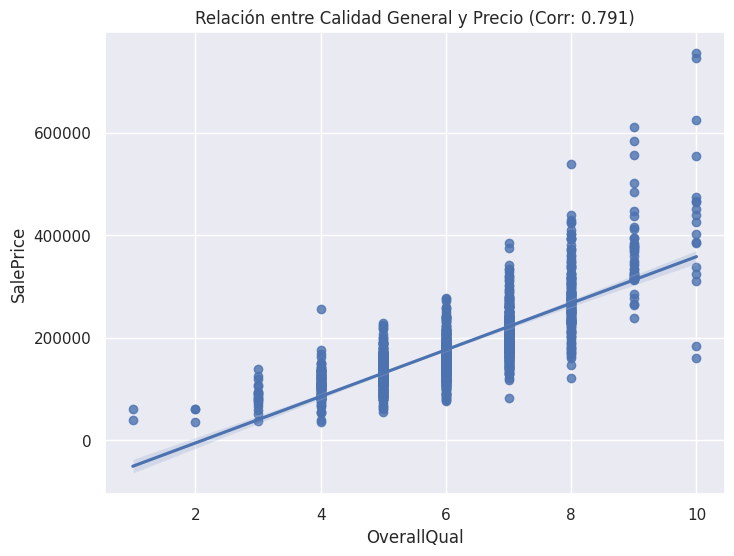

<Figure size 1200x800 with 0 Axes>

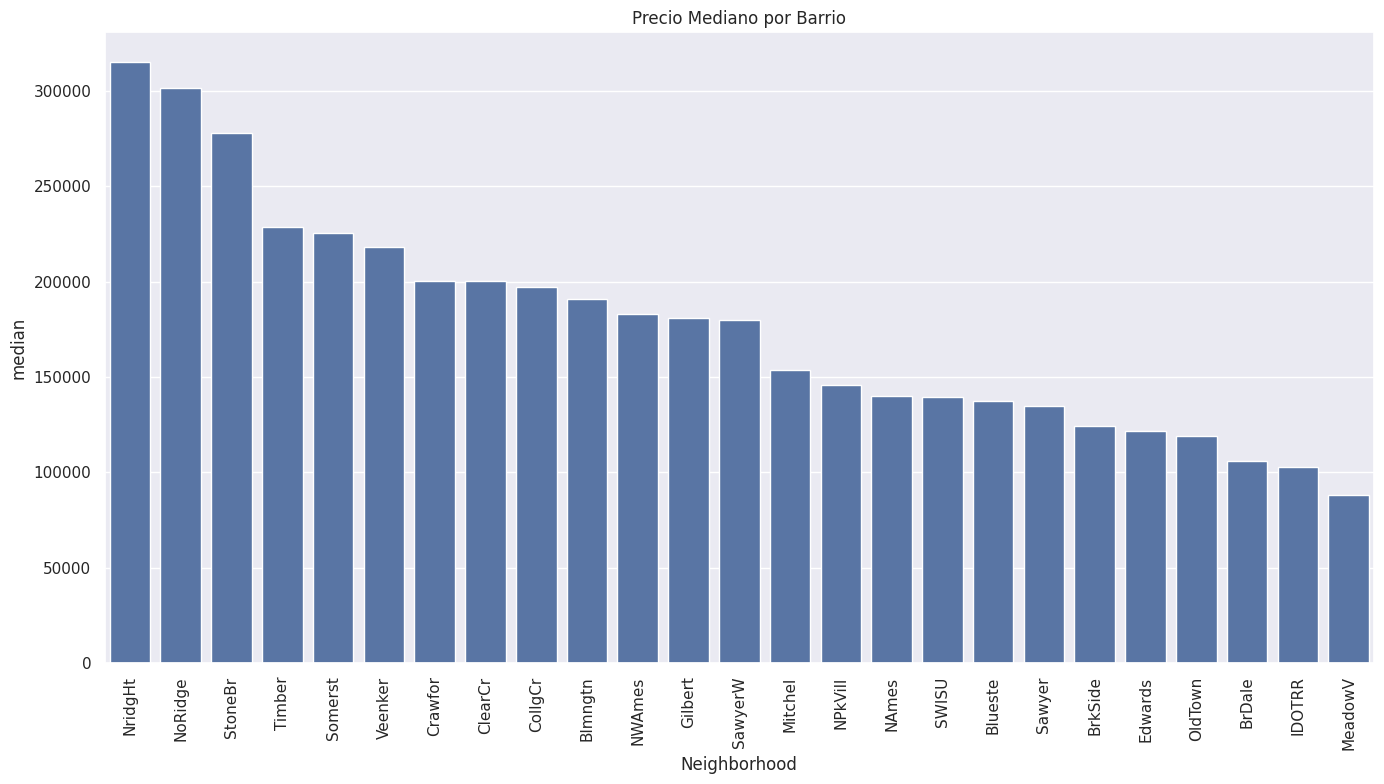

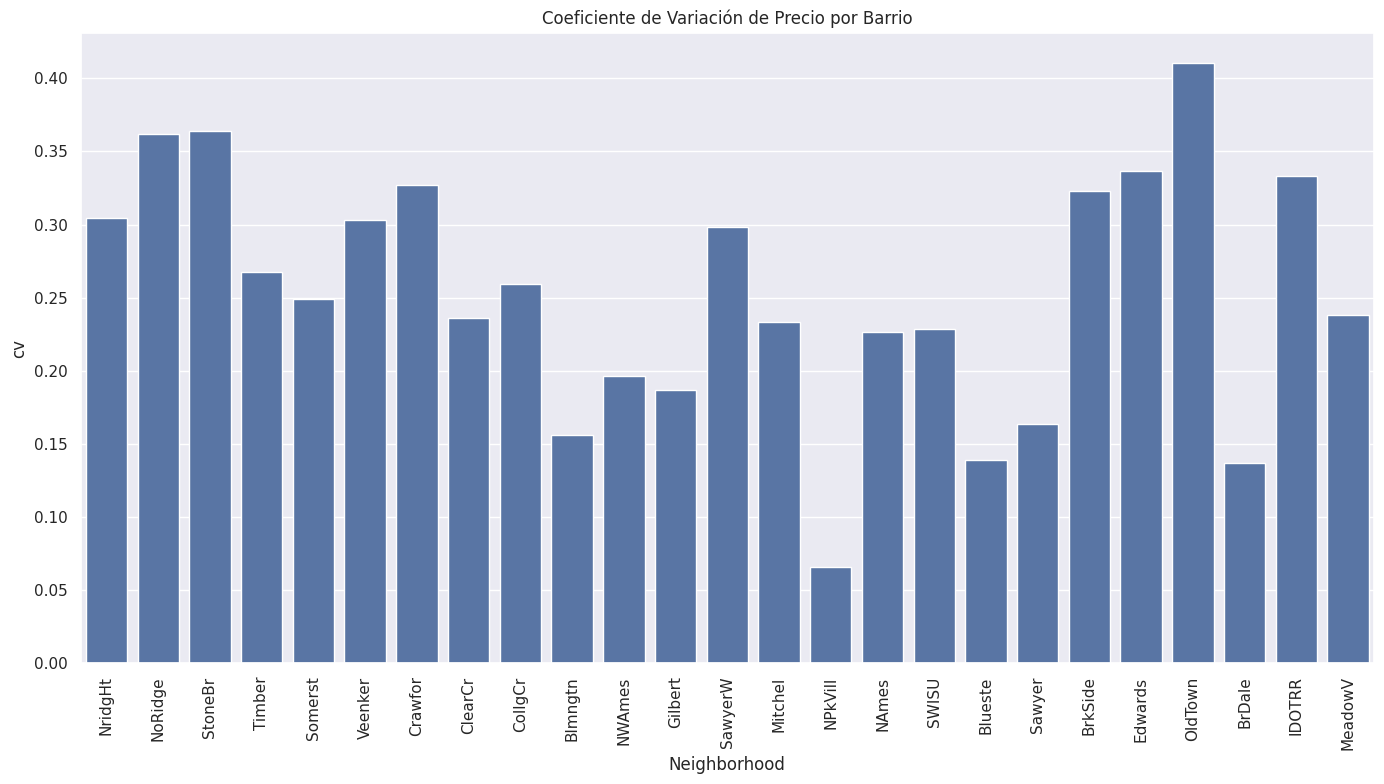

In [ ]:
# Si tenemos la variable objetivo, hacer un análisis básico de correlación con variables sensibles
if target_column and df_sensitive is not None:
    # Verificar correlación entre OverallQual y precio
    if 'OverallQual' in df_sensitive.columns:
        correlation = train_df['SalePrice'].corr(train_df['OverallQual'])
        plt.figure(figsize=(8, 6))
        sns.regplot(x='OverallQual', y='SalePrice', data=train_df)
        plt.title(f'Relación entre Calidad General y Precio (Corr: {correlation:.3f})')
        plt.show()

    # Análisis de varianza de precio por barrio
    if 'Neighborhood' in df_sensitive.columns:
        plt.figure(figsize=(12, 8))
        neighborhood_price_stats = train_df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'std']).reset_index()
        neighborhood_price_stats = neighborhood_price_stats.sort_values('median', ascending=False)

        plt.figure(figsize=(14, 8))
        sns.barplot(x='Neighborhood', y='median', data=neighborhood_price_stats)
        plt.title('Precio Mediano por Barrio')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        # Coeficiente de variación por barrio
        neighborhood_price_stats['cv'] = neighborhood_price_stats['std'] / neighborhood_price_stats['mean']
        plt.figure(figsize=(14, 8))
        sns.barplot(x='Neighborhood', y='cv', data=neighborhood_price_stats)
        plt.title('Coeficiente de Variación de Precio por Barrio')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


🏠 ANÁLISIS DE FAIRNESS POR NEIGHBORHOOD
✅ Dataset cargado: 1460 casas, 25 barrios

📊 ESTADÍSTICAS DE PRECIOS POR BARRIO
----------------------------------------
🔝 TOP 5 BARRIOS (precio mediano más alto):
              count    median     cv categoria
Neighborhood                                  
NridgHt          77  315000.0  0.305      Alto
NoRidge          41  301500.0  0.362      Alto
StoneBr          25  278000.0  0.364      Alto
Timber           38  228475.0  0.268      Alto
Somerst          86  225500.0  0.249      Alto

🔻 BOTTOM 5 BARRIOS (precio mediano más bajo):
              count    median     cv categoria
Neighborhood                                  
Edwards         100  121750.0  0.337      Bajo
OldTown         113  119000.0  0.411      Bajo
BrDale           16  106000.0  0.137      Bajo
IDOTRR           37  103000.0  0.333      Bajo
MeadowV          17   88000.0  0.238      Bajo

⚖️ MÉTRICAS DE DISPARIDAD
------------------------------
• Precio mediano más alto: $315,0

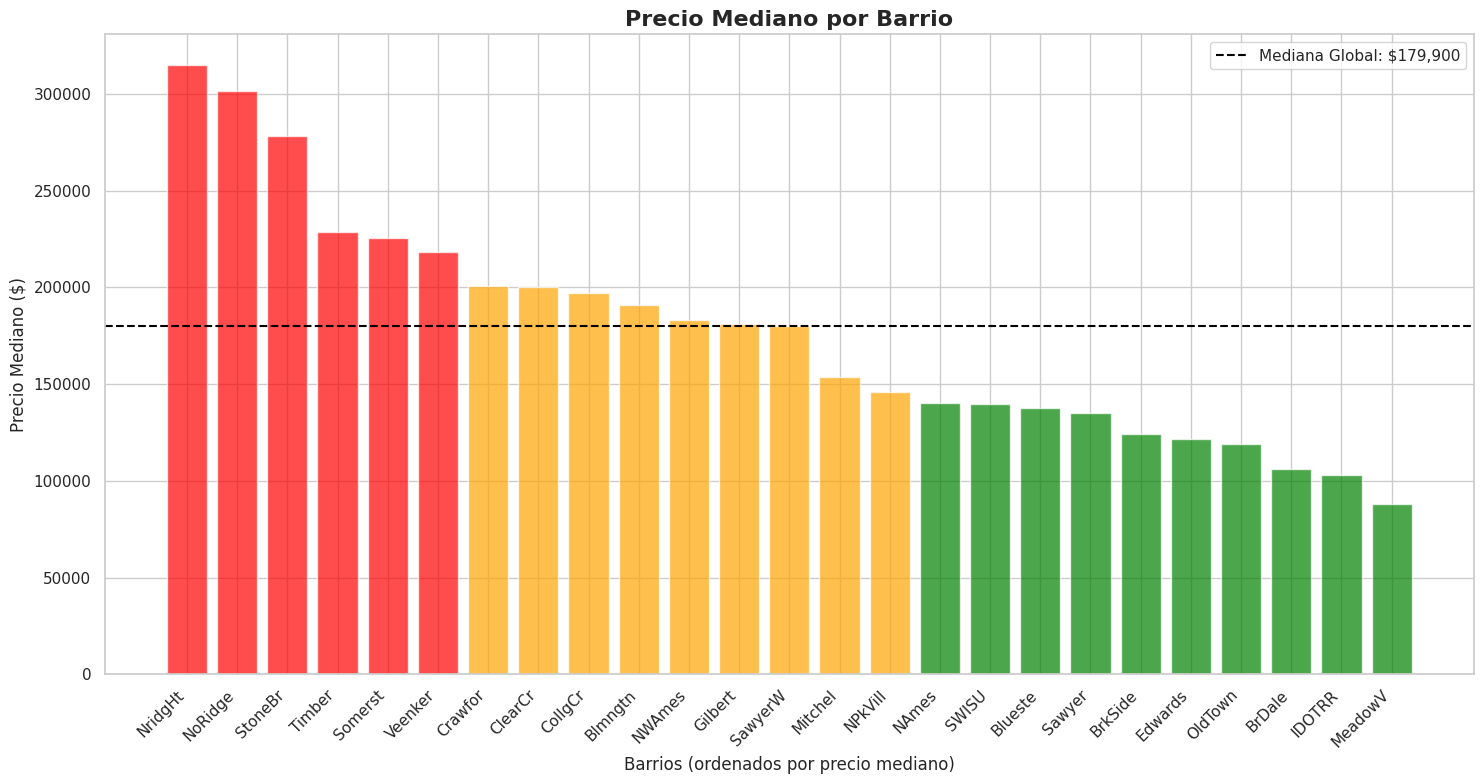

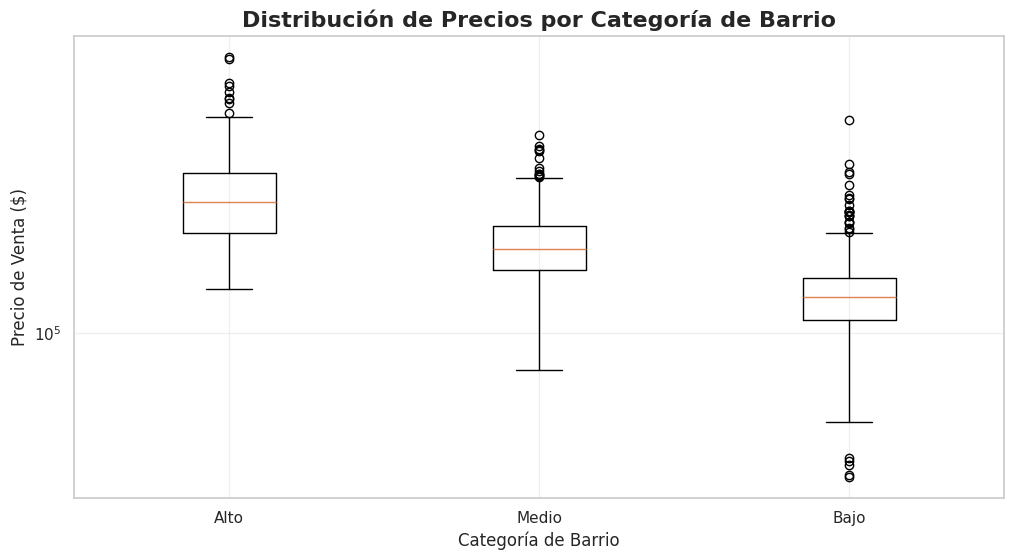


👥 ANÁLISIS DE REPRESENTACIÓN
-----------------------------------
📋 TAMAÑO DE MUESTRA POR CATEGORÍA:
• Alto: 278 casas (19.0%)
• Medio: 515 casas (35.3%)
• Bajo: 667 casas (45.7%)

⚠️ BARRIOS CON MUESTRA PEQUEÑA (< 10 casas):
• NPkVill: 9 casas
• Blueste: 2 casas

📊 ANÁLISIS DE VOLATILIDAD DE PRECIOS
----------------------------------------
🌪️ BARRIOS CON ALTA VOLATILIDAD (CV > 0.3): 9
• NridgHt: CV=0.305, Mediana=$315,000
• NoRidge: CV=0.362, Mediana=$301,500
• StoneBr: CV=0.364, Mediana=$278,000
• Veenker: CV=0.303, Mediana=$218,000
• Crawfor: CV=0.327, Mediana=$200,624

🎯 BARRIOS CON BAJA VOLATILIDAD (CV < 0.15): 3
• NPkVill: CV=0.066, Mediana=$146,000
• Blueste: CV=0.139, Mediana=$137,500
• BrDale: CV=0.137, Mediana=$106,000

📋 RESUMEN EJECUTIVO - FAIRNESS POR NEIGHBORHOOD
🏘️ Total de barrios analizados: 25
💰 Rango de precios medianos: $88,000 - $315,000
⚖️ Factor de disparidad: 3.6x

🚨 INDICADORES DE POSIBLE SESGO:
• Alta volatilidad de precios en muchos barrios

💡 RECOMENDACIONES

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("🏠 ANÁLISIS DE FAIRNESS POR NEIGHBORHOOD")
print("="*50)

# 1. ESTADÍSTICAS BÁSICAS POR BARRIO
print("\n📊 ESTADÍSTICAS DE PRECIOS POR BARRIO")
print("-"*40)

neighborhood_stats = train_df.groupby('Neighborhood')['SalePrice'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(0)

# Coeficiente de variación
neighborhood_stats['cv'] = (neighborhood_stats['std'] / neighborhood_stats['mean']).round(3)

# Categorizar barrios
median_global = neighborhood_stats['median'].median()
neighborhood_stats['categoria'] = neighborhood_stats['median'].apply(
    lambda x: 'Alto' if x > median_global * 1.2
    else 'Bajo' if x < median_global * 0.8
    else 'Medio'
)

neighborhood_stats = neighborhood_stats.sort_values('median', ascending=False)

# Mostrar top y bottom 5 barrios
print("🔝 TOP 5 BARRIOS (precio mediano más alto):")
print(neighborhood_stats[['count', 'median', 'cv', 'categoria']].head())

print("\n🔻 BOTTOM 5 BARRIOS (precio mediano más bajo):")
print(neighborhood_stats[['count', 'median', 'cv', 'categoria']].tail())

# 2. MÉTRICAS DE DISPARIDAD
print("\n⚖️ MÉTRICAS DE DISPARIDAD")
print("-"*30)

max_price = neighborhood_stats['median'].max()
min_price = neighborhood_stats['median'].min()
price_ratio = max_price / min_price
price_std = neighborhood_stats['median'].std()

print(f"• Precio mediano más alto: ${max_price:,.0f}")
print(f"• Precio mediano más bajo: ${min_price:,.0f}")
print(f"• Ratio alto/bajo: {price_ratio:.2f}x")
print(f"• Desviación estándar: ${price_std:,.0f}")

# Distribución por categorías
cat_dist = neighborhood_stats['categoria'].value_counts()
print(f"\n📈 DISTRIBUCIÓN POR CATEGORÍAS:")
for cat, count in cat_dist.items():
    pct = (count / len(neighborhood_stats)) * 100
    print(f"• {cat}: {count} barrios ({pct:.1f}%)")


# Gráfico 1: Precios medianos por barrio
plt.figure(figsize=(15, 8))
colors = ['red' if cat == 'Alto' else 'orange' if cat == 'Medio' else 'green'
          for cat in neighborhood_stats['categoria']]

bars = plt.bar(range(len(neighborhood_stats)),
               neighborhood_stats['median'],
               color=colors, alpha=0.7)

plt.title('Precio Mediano por Barrio', fontsize=16, fontweight='bold')
plt.xlabel('Barrios (ordenados por precio mediano)', fontsize=12)
plt.ylabel('Precio Mediano ($)', fontsize=12)
plt.xticks(range(len(neighborhood_stats)),
           neighborhood_stats.index, rotation=45, ha='right')

# Línea de referencia (mediana global)
plt.axhline(y=median_global, color='black', linestyle='--',
            label=f'Mediana Global: ${median_global:,.0f}')

plt.legend()
plt.tight_layout()
plt.show()

# Gráfico 2: Distribución de precios por categoría
plt.figure(figsize=(12, 6))
category_order = ['Alto', 'Medio', 'Bajo']
category_data = []

for cat in category_order:
    neighborhoods_in_cat = neighborhood_stats[neighborhood_stats['categoria'] == cat].index
    prices_in_cat = train_df[train_df['Neighborhood'].isin(neighborhoods_in_cat)]['SalePrice']
    category_data.append(prices_in_cat)

plt.boxplot(category_data, labels=category_order)
plt.title('Distribución de Precios por Categoría de Barrio', fontsize=16, fontweight='bold')
plt.xlabel('Categoría de Barrio', fontsize=12)
plt.ylabel('Precio de Venta ($)', fontsize=12)
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.grid(True, alpha=0.3)
plt.show()

# 4. ANÁLISIS DE EQUIDAD REPRESENTATIVA
print("\n👥 ANÁLISIS DE REPRESENTACIÓN")
print("-"*35)

# Tamaño de muestra por categoría
sample_sizes = train_df.groupby(
    train_df['Neighborhood'].map(neighborhood_stats['categoria'])
)['SalePrice'].count()

print("📋 TAMAÑO DE MUESTRA POR CATEGORÍA:")
for cat in ['Alto', 'Medio', 'Bajo']:
    if cat in sample_sizes.index:
        count = sample_sizes[cat]
        pct = (count / len(train_df)) * 100
        print(f"• {cat}: {count} casas ({pct:.1f}%)")

# Identificar barrios con muestras pequeñas
small_sample_threshold = 10
small_sample_neighborhoods = neighborhood_stats[
    neighborhood_stats['count'] < small_sample_threshold
]

if len(small_sample_neighborhoods) > 0:
    print(f"\n⚠️ BARRIOS CON MUESTRA PEQUEÑA (< {small_sample_threshold} casas):")
    for neighborhood, row in small_sample_neighborhoods.iterrows():
        print(f"• {neighborhood}: {int(row['count'])} casas")
else:
    print(f"\n✅ Todos los barrios tienen muestras >= {small_sample_threshold} casas")

# 5. COEFICIENTE DE VARIACIÓN (ANÁLISIS DE VOLATILIDAD)
print("\n📊 ANÁLISIS DE VOLATILIDAD DE PRECIOS")
print("-"*40)

high_volatility = neighborhood_stats[neighborhood_stats['cv'] > 0.3]
low_volatility = neighborhood_stats[neighborhood_stats['cv'] < 0.15]

print(f"🌪️ BARRIOS CON ALTA VOLATILIDAD (CV > 0.3): {len(high_volatility)}")
if len(high_volatility) > 0:
    for neighborhood, row in high_volatility[['median', 'cv']].head().iterrows():
        print(f"• {neighborhood}: CV={row['cv']:.3f}, Mediana=${row['median']:,.0f}")

print(f"\n🎯 BARRIOS CON BAJA VOLATILIDAD (CV < 0.15): {len(low_volatility)}")
if len(low_volatility) > 0:
    for neighborhood, row in low_volatility[['median', 'cv']].head().iterrows():
        print(f"• {neighborhood}: CV={row['cv']:.3f}, Mediana=${row['median']:,.0f}")

# 6. RESUMEN EJECUTIVO
print("\n" + "="*60)
print("📋 RESUMEN EJECUTIVO - FAIRNESS POR NEIGHBORHOOD")
print("="*60)

print(f"🏘️ Total de barrios analizados: {len(neighborhood_stats)}")
print(f"💰 Rango de precios medianos: ${min_price:,.0f} - ${max_price:,.0f}")
print(f"⚖️ Factor de disparidad: {price_ratio:.1f}x")

# Identificar posibles sesgos
bias_indicators = []

if price_ratio > 5:
    bias_indicators.append("Alta disparidad de precios entre barrios")

if len(small_sample_neighborhoods) > len(neighborhood_stats) * 0.2:
    bias_indicators.append("Múltiples barrios con representación insuficiente")

if len(high_volatility) > len(neighborhood_stats) * 0.3:
    bias_indicators.append("Alta volatilidad de precios en muchos barrios")

print(f"\n🚨 INDICADORES DE POSIBLE SESGO:")
if bias_indicators:
    for indicator in bias_indicators:
        print(f"• {indicator}")
else:
    print("• No se detectaron indicadores críticos de sesgo")

print(f"\n💡 RECOMENDACIONES:")
print("• Considerar técnicas de re-balanceo para barrios sub-representados")
print("• Evaluar modelos separados para diferentes categorías de barrios")
print("• Monitorear métricas de fairness en predicciones futuras")

print("\n✅ Análisis de fairness completado!")